In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

In [3]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [71]:
fetch_tweets=tweepy.Cursor(api.search, q="#AMZN",count=100, lang ="en",since="2018-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [72]:
data

,Date,Tweets
0,2021-12-01,The best of gifts are here: #AAPL #TSLA #MSFT ...
1,2021-12-01,#EURCAD All TPs Hit! 110 PIPS Profit🔥✅⭐️\n\nGo...
2,2021-12-01,"The market toying with my emotions, i think im..."
3,2021-12-01,Swinging some $AMZN 12/10/21 3500C's overnight...
4,2021-12-01,U were warned !! #amzn https://t.co/rf1tKnZpke
...,...,...
316,2021-11-23,@Jim_Jordan and how many of the missing 80K-Tr...
317,2021-11-23,$AMZN #AMZN - closed back into its most recent...
318,2021-11-23,Following were the Top 5 tickers mentioned on ...
319,2021-11-22,#marketing $gdet $vvs $cake $qnt #ma $woo $ast...


In [73]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    index=index+1
print(cdata.dtypes)

Date      object
Tweets    object
dtype: object


In [74]:
cdata

,Date,Tweets
0,2021-12-01,The best of gifts are here AAPL TSLA MSFT AMZN...
1,2021-12-01,EURCAD All TPs Hit 110 PIPS ProfitGo and check...
2,2021-12-01,The market toying with my emotions i think im ...
3,2021-12-01,Swinging some AMZN 121021 3500Cs overnight At ...
4,2021-12-01,U were warned amzn httpstcorf1tKnZpke
...,...,...
316,2021-11-23,JimJordan and how many of the missing 80KTruck...
317,2021-11-23,AMZN AMZN closed back into its most recent re...
318,2021-11-23,Following were the Top 5 tickers mentioned on ...
319,2021-11-22,marketing gdet vvs cake qnt ma woo asts amzn a...


In [78]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [79]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [80]:
ccdata

,Date,Tweets
0,2021-12-01,The best of gifts are here AAPL TSLA MSFT AMZN...
1,2021-11-30,AMZN DailyAMZN so far disappointing perform...
2,2021-11-29,Blazing Stock Detected 20211129 Amazoncom I...
3,2021-11-28,AMZN AMZN35734511242021 10 Min OptionsYELLOWR...
4,2021-11-27,AMZN Daily amp WeeklyAMZN Was trying to tak...
5,2021-11-26,RT bestcopytrade jeppekirkbonde One of the be...
6,2021-11-25,Comparing Tesla to GM and Ford is like compar...
7,2021-11-24,I hate amzn Amazon 0 sustainable AMZN perfect...
8,2021-11-23,RT RippaDaKid Shop httpstcoP8rXm9CXVg Follow...


In [81]:
read_stock_p=pd.read_csv('AMZN.csv')
# DOWNLOAD UPDATED CLOSE PRICE FROM https://finance.yahoo.com/quote/UAL/history?period1=1598918400&period2=1632268800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-31,3408.989990,3495.000000,3405.000000,3450.959961,3450.959961,4185900
1,2020-09-01,3489.580078,3513.870117,3467.000000,3499.120117,3499.120117,3432200
2,2020-09-02,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,3931500
3,2020-09-03,3485.000000,3488.409912,3303.000000,3368.000000,3368.000000,8161100
4,2020-09-04,3318.000000,3381.500000,3111.129883,3294.620117,3294.620117,8781800
...,...,...,...,...,...,...,...
310,2021-11-22,3676.379883,3713.459961,3567.500000,3572.570068,3572.570068,4842200
311,2021-11-23,3585.040039,3621.050049,3527.709961,3580.040039,3580.040039,3690200
312,2021-11-24,3562.669922,3613.639893,3536.850098,3580.409912,3580.409912,2328000
313,2021-11-26,3602.100098,3633.500000,3504.149902,3504.560059,3504.560059,2991300


In [82]:
ccdata['Prices']=""

In [83]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            print(get_stock_date," ",get_tweet_date)
            #ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

2021-11-29   2021-11-29
2021-11-26   2021-11-26
2021-11-24   2021-11-24
2021-11-23   2021-11-23


In [84]:
ccdata

,Date,Tweets,Prices
0,2021-12-01,The best of gifts are here AAPL TSLA MSFT AMZN...,
1,2021-11-30,AMZN DailyAMZN so far disappointing perform...,
2,2021-11-29,Blazing Stock Detected 20211129 Amazoncom I...,3561
3,2021-11-28,AMZN AMZN35734511242021 10 Min OptionsYELLOWR...,
4,2021-11-27,AMZN Daily amp WeeklyAMZN Was trying to tak...,
5,2021-11-26,RT bestcopytrade jeppekirkbonde One of the be...,3504
6,2021-11-25,Comparing Tesla to GM and Ford is like compar...,
7,2021-11-24,I hate amzn Amazon 0 sustainable AMZN perfect...,3580
8,2021-11-23,RT RippaDaKid Shop httpstcoP8rXm9CXVg Follow...,3580


In [85]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

In [86]:
ccdata

,Date,Tweets,Prices
0,2021-12-01,The best of gifts are here AAPL TSLA MSFT AMZN...,3556
1,2021-11-30,AMZN DailyAMZN so far disappointing perform...,3556
2,2021-11-29,Blazing Stock Detected 20211129 Amazoncom I...,3561
3,2021-11-28,AMZN AMZN35734511242021 10 Min OptionsYELLOWR...,3556
4,2021-11-27,AMZN Daily amp WeeklyAMZN Was trying to tak...,3556
5,2021-11-26,RT bestcopytrade jeppekirkbonde One of the be...,3504
6,2021-11-25,Comparing Tesla to GM and Ford is like compar...,3556
7,2021-11-24,I hate amzn Amazon 0 sustainable AMZN perfect...,3580
8,2021-11-23,RT RippaDaKid Shop httpstcoP8rXm9CXVg Follow...,3580


In [87]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [88]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2021-12-01,The best of gifts are here AAPL TSLA MSFT AMZN...,3556,,,,
1,2021-11-30,AMZN DailyAMZN so far disappointing perform...,3556,,,,
2,2021-11-29,Blazing Stock Detected 20211129 Amazoncom I...,3561,,,,
3,2021-11-28,AMZN AMZN35734511242021 10 Min OptionsYELLOWR...,3556,,,,
4,2021-11-27,AMZN Daily amp WeeklyAMZN Was trying to tak...,3556,,,,
5,2021-11-26,RT bestcopytrade jeppekirkbonde One of the be...,3504,,,,
6,2021-11-25,Comparing Tesla to GM and Ford is like compar...,3556,,,,
7,2021-11-24,I hate amzn Amazon 0 sustainable AMZN perfect...,3580,,,,
8,2021-11-23,RT RippaDaKid Shop httpstcoP8rXm9CXVg Follow...,3580,,,,


In [89]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [91]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2021-12-01,The best of gifts are here AAPL TSLA MSFT AMZN...,3556,0.9959,0.025,0.874,0.9959
1,2021-11-30,AMZN DailyAMZN so far disappointing perform...,3556,-0.9254,0.073,0.861,-0.9254
2,2021-11-29,Blazing Stock Detected 20211129 Amazoncom I...,3561,0.9848,0.025,0.922,0.9848
3,2021-11-28,AMZN AMZN35734511242021 10 Min OptionsYELLOWR...,3556,0.8942,0.03,0.907,0.8942
4,2021-11-27,AMZN Daily amp WeeklyAMZN Was trying to tak...,3556,0.773,0.041,0.842,0.773
5,2021-11-26,RT bestcopytrade jeppekirkbonde One of the be...,3504,0.9139,0.056,0.835,0.9139
6,2021-11-25,Comparing Tesla to GM and Ford is like compar...,3556,0.8668,0.059,0.831,0.8668
7,2021-11-24,I hate amzn Amazon 0 sustainable AMZN perfect...,3580,0.9983,0.082,0.765,0.9983
8,2021-11-23,RT RippaDaKid Shop httpstcoP8rXm9CXVg Follow...,3580,0.997,0.037,0.825,0.997


% of positive tweets=  88.88888888888889
% of negative tweets=  11.11111111111111


[]

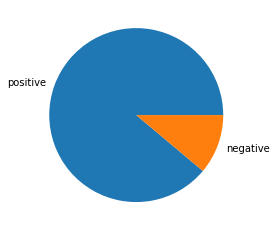

In [92]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [93]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [94]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2021-12-01,3556,0.9959,0.025,0.874,0.9959
1,2021-11-30,3556,-0.9254,0.073,0.861,-0.9254
2,2021-11-29,3561,0.9848,0.025,0.922,0.9848
3,2021-11-28,3556,0.8942,0.03,0.907,0.8942
4,2021-11-27,3556,0.773,0.041,0.842,0.773
5,2021-11-26,3504,0.9139,0.056,0.835,0.9139
6,2021-11-25,3556,0.8668,0.059,0.831,0.8668
7,2021-11-24,3580,0.9983,0.082,0.765,0.9983
8,2021-11-23,3580,0.997,0.037,0.825,0.997


In [95]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

In [96]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [45]:
print(numpy_df_train)

[[0.023  0.9971]
 [0.024  1.    ]
 [0.054  0.9995]
 [0.055  0.9908]
 [0.105  0.9525]
 [0.06   0.9966]]


In [46]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [97]:
print(numpy_df_test)

[[0.027  0.9976]
 [0.034  0.9985]
 [0.023  0.9972]]


In [101]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0    3556
1    3556
2    3561
3    3556
4    3556
5    3504


In [99]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor()

In [102]:
prediction = rf.predict(numpy_df_test)

In [103]:
print(prediction)

[3552.47 3551.92 3552.47]


In [104]:
import matplotlib.pyplot as plt

In [105]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [106]:
predictions_df_

,Prices
6,3552.47
7,3551.92
8,3552.47


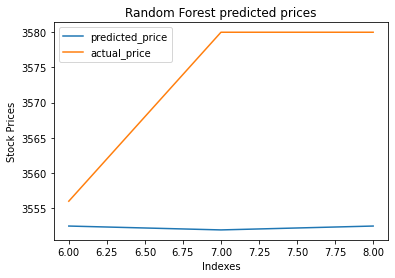

In [107]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [108]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [59]:
reg.predict(numpy_df_test)

array([[44.01525092],
       [43.52523267],
       [44.28369371]])

In [110]:
stocks_dataf = pd.read_pickle('Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

In [111]:
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


In [114]:
stocks_dataf = stocks_dataf.reset_index().rename(columns = {'index':'Date'})

In [115]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['Date','adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

,Date,Date,adj_close_price,Tweets
0,0,2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
1,1,2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2,2,2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
3,3,2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
4,4,2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
...,...,...,...,...
3648,3648,2016-12-27,19945,Should the U.S. Embassy Be Moved From Tel Avi...
3649,3649,2016-12-28,19833,"When Finding the Right Lawyer Seems Daunting,..."
3650,3650,2016-12-29,19819,Does Empathy Guide or Hinder Moral Action?. C...
3651,3651,2016-12-30,19762,Shielding Seized Assets From Corruption’s Clu...


In [116]:
dataframe = stocks_dataf[['adj_close_price']].copy()

In [117]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''

In [66]:
dataframe


,adj_close_price,Comp,Negative,Neutral,Positive
0,12469,,,,
1,12472,,,,
2,12474,,,,
3,12480,,,,
4,12398,,,,
...,...,...,...,...,...
3648,19945,,,,
3649,19833,,,,
3650,19819,,,,
3651,19762,,,,


In [118]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [119]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in dataframe.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe['Comp'].iloc[indexx] = sentence_sentiment['compound']
        dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
        dataframe['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        dataframe['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        # dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [125]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
0,12469,-0.9814,0.159,0.749,-0.9814
1,12472,-0.8179,0.114,0.787,-0.8179
2,12474,-0.9993,0.198,0.737,-0.9993
3,12480,-0.9982,0.131,0.806,-0.9982
4,12398,-0.9901,0.124,0.794,-0.9901
...,...,...,...,...,...
3648,19945,-0.9898,0.178,0.719,-0.9898
3649,19833,0.2869,0.128,0.763,0.2869
3650,19819,-0.9789,0.138,0.764,-0.9789
3651,19762,-0.995,0.168,0.734,-0.995


% of positive tweets=  45.414727621133316
% of negative tweets=  54.39364905557076


[]

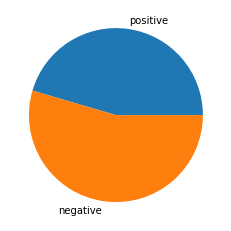

In [123]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()